In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

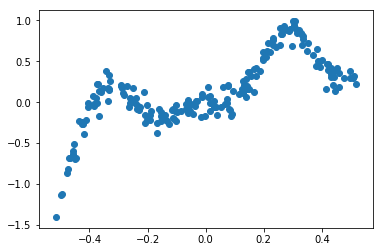

In [3]:
plt.scatter(x, y)

In [4]:
xx = np.linspace(min(x), max(x), num=200)

In [5]:
import mylibrary.nnlib as tnn
colors = ['plum', 'violet', 'magenta','darkviolet', 'purple', 'indigo']

In [6]:
x_data = x.reshape(-1,1)
y_data = y.reshape(-1,1)
# xx_data = xx.reshape(-1,1)

In [8]:
hidden_size = 3
optimizer = tnn.Adam(learning_rate=0.01)
layer1 = tnn.NonLinearLayer(1, hidden_size, activation=tnn.Relu(), optimizer=optimizer)
layer2 = tnn.LinearLayer(hidden_size, 1, optimizer=optimizer)

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    
    a1 = layer1.forward(x_data)
    a2 = layer2.forward(a1)
    
    loss = tnn.MseLoss.loss(a2, y_data)
    dy = tnn.MseLoss.del_loss(a2, y_data)
    
    da1 = layer2.backward(dy)
    dx = layer1.backward(da1)
    
    
    layer1.update()
    layer2.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', c='g', lw=1, label='x, dx')
        plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=1, label='x,a2')
        plt.scatter(x, dy.reshape(-1), marker='+', c='m', lw=1, label='x,dy')
        plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
        plt.plot(x, np.zeros_like(x), c='b', lw=1)
        plt.legend()
        
        for i, out in enumerate(a1.T):
            plt.scatter(x, out, marker='.', c=colors[i], lw=1)
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.20248007688229863
_______________________
epoch 10
Loss 0.12288039481986349
_______________________
epoch 20
Loss 0.07807241704466261
_______________________
epoch 30
Loss 0.05518323075675603
_______________________
epoch 40
Loss 0.04385399571557624
_______________________
epoch 50
Loss 0.038526446789315216
_______________________
epoch 60
Loss 0.036106678054504876
_______________________
epoch 70
Loss 0.03500156704054864
_______________________
epoch 80
Loss 0.03443998094333845
_______________________
epoch 90
Loss 0.03410893297329229
_______________________
epoch 100
Loss 0.03387323628329301
_______________________
epoch 110
Loss 0.033653047271773304
_______________________
epoch 120
Loss 0.033429273617933776
_______________________
epoch 130
Loss 0.033217288420056175
_______________________
epoch 140
Loss 0.033011467015327686
_______________________
epoch 150
Loss 0.03280151480593478
_______________________
epoch 160
Loss 0.03259448557676497
__

_______________________
epoch 1390
Loss 0.02321210821502976
_______________________
epoch 1400
Loss 0.023212086440174425
_______________________
epoch 1410
Loss 0.02321206720807972
_______________________
epoch 1420
Loss 0.023212045876079754
_______________________
epoch 1430
Loss 0.023212020584309188
_______________________
epoch 1440
Loss 0.023212002458437842
_______________________
epoch 1450
Loss 0.023211992546358563
_______________________
epoch 1460
Loss 0.023211979071248542
_______________________
epoch 1470
Loss 0.023211968529163154
_______________________
epoch 1480
Loss 0.023211970959083176
_______________________
epoch 1490
Loss 0.023211960734250546
_______________________
epoch 1500
Loss 0.023211960888957956
_______________________
epoch 1510
Loss 0.023211966024409444
_______________________
epoch 1520
Loss 0.023211944246110127
_______________________
epoch 1530
Loss 0.023211943807064168
_______________________
epoch 1540
Loss 0.023211953740452162
_______________________
ep

TclError: this isn't a Tk application

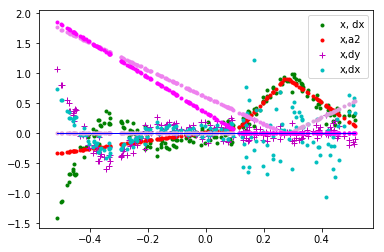

In [9]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', lw=1, label='x, dx')
plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=1, label='x,a2')
plt.scatter(x, dy.reshape(-1), marker='+', c='m', lw=1, label='x,dy')
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1, label='x,dx')
plt.plot(x, np.zeros_like(x), c='b', lw=1)
for i, out in enumerate(a1.T):
            plt.scatter(x, out, marker='.', c=colors[i], lw=1)
plt.legend()

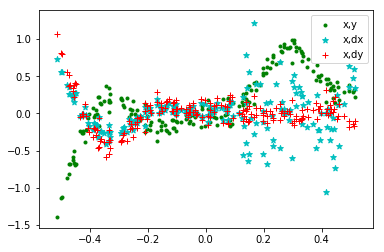

In [10]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='+', c='r', lw=1, label='x,dy')
plt.legend()

In [11]:
# here it is.. the error problem is partially solved; the scaling of the dx is not proper
# now solving the error : dx till error decrreases to threshold
dx.mean()

0.0001743191940376293

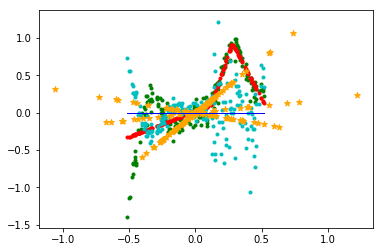

In [12]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g')
plt.scatter(x, a2.reshape(-1), marker='.', c='r', lw=1)
plt.scatter(x, dx.reshape(-1), marker='.', c='c', lw=1)
plt.plot(x, np.zeros_like(x), c='b', lw=1)
plt.scatter(dx.reshape(-1), dy.reshape(-1), marker='*', c='orange', lw=1)
# Relation not linear between dx and dy

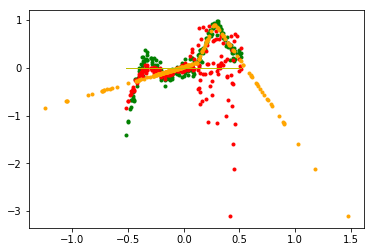

In [38]:
new_x = x_data - dx
_a1 = layer1.forward(new_x)
_a2 = layer2.forward(_a1)
_dy = tnn.MseLoss.del_loss(_a2, y_data)


%matplotlib inline
plt.scatter(x, y, marker='.', c='g')
plt.scatter(x, _a2.reshape(-1), marker='.', c='r', lw=1)
# plt.scatter(x, _dy.reshape(-1), marker='+', c='b', lw=1)

plt.scatter(new_x, _a2.reshape(-1), marker='.', c='orange', lw=1)
plt.plot(x, np.zeros_like(x), c='y', lw=1)

In [36]:
ndx = dx

78.74698466687425


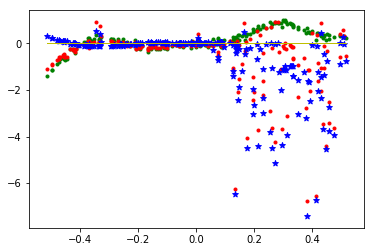

In [39]:
new_x = x_data - ndx #* 0.3
_a1 = layer1.forward(new_x)
_a2 = layer2.forward(_a1)


_dy = tnn.MseLoss.del_loss(_a2, y_data)
_da1 = layer2.backward(_dy)
_dx = layer1.backward(_da1)

plt.scatter(x, y, marker='.', c='g')
# plt.scatter(new_x, y, marker='+', c='teal')
plt.scatter(x, _a2.reshape(-1), marker='.', c='r', lw=1)
plt.scatter(x, _dy.reshape(-1), marker='*', c='b', lw=1, label='x,dy')
# plt.scatter(x, _dx.reshape(-1), marker='+', c='c', lw=1, label='x,dx_')
plt.plot(x, np.zeros_like(x), c='y', lw=1)

print(ndx.sum())
ndx = ndx + _dx

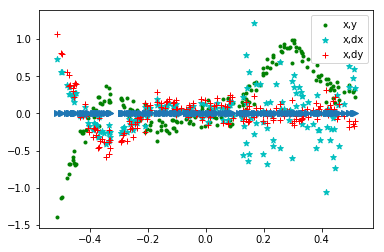

In [49]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, dx.reshape(-1), marker='*', c='c', lw=1, label='x,dx')
plt.scatter(x, dy.reshape(-1), marker='+', c='r', lw=1, label='x,dy')
plt.scatter(x, np.ones_like(x)*dy.mean(), marker='>', lw=1)
plt.legend()

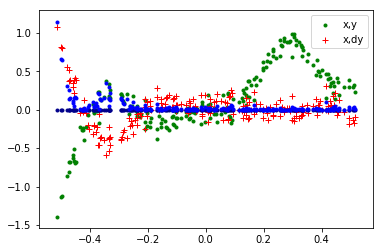

In [58]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, dy.reshape(-1), marker='+', c='r', lw=1, label='x,dy')
plt.scatter(x, np.ones_like(x)*dy.mean(), marker='.',c='darkblue', lw=1)
plt.scatter(x, np.square(dy.reshape(-1)), marker='.',c='blue', lw=1)
plt.legend()

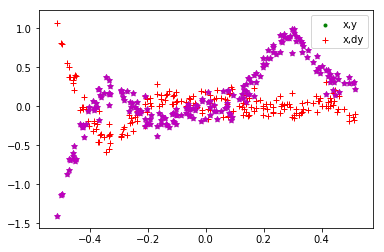

In [69]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, dy.reshape(-1), marker='+', c='r', lw=1, label='x,dy')
plt.scatter(x, y, marker='*',c='m', lw=1)
plt.legend()